In [247]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

In [160]:
rental = pd.read_csv('Final_rental_big.csv')

In [161]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,...,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly,HasDen
0,1864.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2003.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2347.0,2.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2134.0,1.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2475.0,2.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [162]:
rental.shape

(7051, 226)

In [163]:
#Min max scaler latitude and longitude
lat_scaler = MinMaxScaler()
rental['latitude'] = lat_scaler.fit_transform(rental['latitude'].values.reshape(-1, 1))

long_scaler = MinMaxScaler()
rental['longitude'] = long_scaler.fit_transform(rental['longitude'].values.reshape(-1, 1))

In [164]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,...,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly,HasDen
0,1864.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2003.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2347.0,2.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2134.0,1.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2475.0,2.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [165]:
#One hot encoding location col, concat to df and delete the original location col
enc = OneHotEncoder(handle_unknown='ignore')
matrix_fitted = enc.fit_transform(rental.location.values.reshape(-1, 1)).toarray()
matrix_colname = enc.get_feature_names(['location'])
fitted_df = pd.DataFrame(matrix_fitted, columns=matrix_colname)
final_rental = pd.concat([rental, fitted_df], sort=False, axis = 1).drop(columns=['location'])
final_rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
0,1864.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2003.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2347.0,2.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2134.0,1.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2475.0,2.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [195]:
#Reduced price set
reduced_rental = final_rental[(final_rental['price'] <= 7741.5) & (final_rental['price'] >= 300) ]
reduced_rental = reduced_rental.drop_duplicates()

In [196]:
random_seed = 2020

In [198]:
def accuracy(test, pred):
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)
    print("Mean Squared Error is: {} \n".format(mse))
    print("Root Mean Squared Error is: {} \n".format(sqrt(mse)))
    print("Mean Absolute Error is: {} \n".format(mae))

In [259]:
def run_model(df, model = 'LGB', with_pca = False, random_state = random_seed, num_of_features = 0):
    '''
    model of choice: LightGBM Regressor ('LGB') or ElasticNet ('Elastic')
    with_pca: whether use pca to reduce features
    num_of_features: use when with pca = True, number of pca features you wanted to keep
    '''
    
    X = df.drop(columns=['price'])
    y = df.price
    
    if with_pca == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    else:
        if num_of_features == 0:
            return("Please input number of PCA features you want to keep!")
        else:
            pca = PCA(random_state= random_seed)
            pca.fit(X)
            pca.data = pca.transform(X)
            per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
            labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
            pca_df = pd.DataFrame(pca.data[:, :num_of_features], columns = labels[:num_of_features])
            X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=random_seed) 
    
    if model == 'LGB':
        #Baseline LGB model
        model = LGBMRegressor(boosting_type='gbdt', objective='regression', 
                      learning_rate=0.1, n_estimators=100, num_leaves=31, 
                      metric='rmse', verbose = 1)
        
        print("Training LightGBM model: \n")
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        used_time = end - start
        print("Training Complete! Used {} seconds \n".format(used_time))

        lgbm_train_pred = model.predict(X_train)
        print("Training Accuracy: \n")
        accuracy(y_train, lgbm_train_pred)
        print("Testing Accuracy: \n")
        lgbm_pred = model.predict(X_test)
        accuracy(y_test, lgbm_pred)
        
        return model
        
    elif model == 'Elastic':
        #Baseline elastic net
        print("Training Elastic Net model: \n")
        start = time.time()
        elastic_model = ElasticNet(random_state=random_seed).fit(X_train, y_train)
        end = time.time()
        used_time = end - start
        print("Training Complete! Used {} seconds \n".format(used_time))
        
        elastic_pred_train = elastic_model.predict(X_train)
        elastic_pred_test = elastic_model.predict(X_test)
        
        print("Training Accuracy: \n")
        accuracy(y_train, elastic_pred_train)
        print("Testing Accuracy: \n")
        accuracy(y_test, elastic_pred_test)
        
        return elastic_model

## Baseline Modeling

In [256]:
LGBM_reduced_rental = run_model(reduced_rental)

Training LightGBM model: 

Training Complete! Used 0.43681979179382324 seconds 

Training Accuracy: 

Mean Squared Error is: 284655.7252661314 

Root Mean Squared Error is: 533.5313723354338 

Mean Absolute Error is: 373.9473919911237 

Testing Accuracy: 

Mean Squared Error is: 499980.1033340091 

Root Mean Squared Error is: 707.0927119791359 

Mean Absolute Error is: 482.3001596962127 



## Testing pca

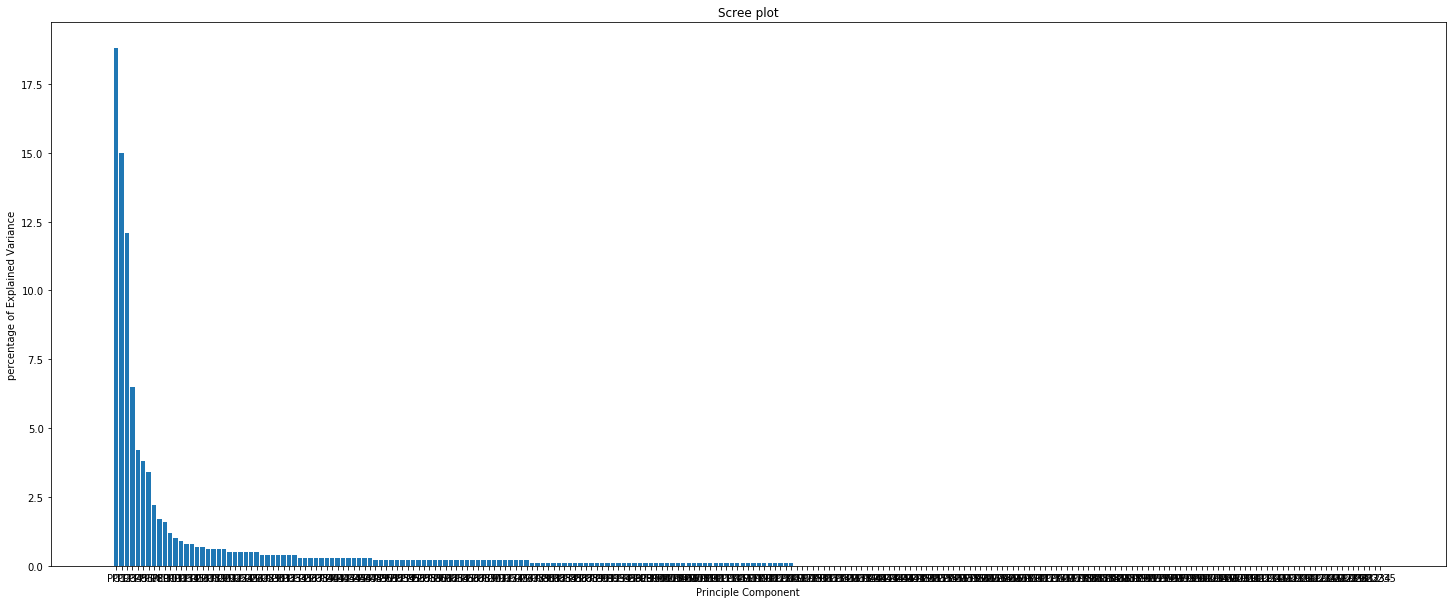

In [205]:
pca = PCA(random_state= random_seed)
pca.fit(X)
pca.data = pca.transform(X)

#Percentage variance of each pca component stands for
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
#Create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Plot the data
plt.figure(figsize = (25, 10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree plot')
plt.show()

In [206]:
def select_pc(percen_var, threshold = 90):
    '''
    tells you how many principle components you need to keep to retain threshold % of variance
    percen_var: array of feature variance
    threshold: number between 0 to 100
    '''
    if threshold > 100:
        print("Please enter threshold smaller than 100%")
    
    for i in range(len(percen_var)):
        if sum(percen_var[:i]) >= threshold:
            print('PC1 + PC{} add up to {} % of the variance'.format(i+1, round(sum(percen_var[:i]), 2)))
            break
            
    if sum(percen_var[:-1]) <= threshold:
        print("please enter a lower threshold, max threshold: {}%".format(round(sum(per_var[:-1]),2)))

In [207]:
select_pc(per_var, threshold=95)

PC1 + PC93 add up to 95.1 % of the variance


In [208]:
def get_redundant_pairs(df):
    '''
    Get diagonal and lower triangular pairs of correlation matrix
    '''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df, n = 5):
    '''
    get both top5 and final 5 less correlated features
    returns the top n variable names in a list
    '''
    #df = df.drop('ID_code', axis = 1)
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    print("Top {} Absolute Correlations".format(n))
    print(au_corr[0:n])
    print('---' * 16)
    print("Bottom {} Absolute Correlations".format(n))
    print(au_corr[-n:])
    
    var_list = []
    for i in range(n):
        var_list.append(au_corr[0:n].index[i][1])
    
    return var_list

In [209]:
top_list = get_abs_correlations(reduced_rental, 16)

Top 16 Absolute Correlations
Cooktop            HoodFan                   1.000000
OutdoorPlayground  ParkingIndoor             1.000000
CatFriendly        DogFriendly               1.000000
BikeTrail          PlaygroundPark            1.000000
Hookups            LaundryRoom               1.000000
CardLaundry        SecurityGuard             1.000000
fridgeincluded     ovenincluded              0.985540
Dryer              Washer                    0.961656
Fridge             Stove                     0.960492
DogFriendly        OnSiteResidentManagers    0.957082
CatFriendly        OnSiteResidentManagers    0.957082
freezerincluded    fridgeincluded            0.955977
                   ovenincluded              0.939543
24HSurveillance    CommunityGarden           0.935280
Bars               Cafe                      0.924388
Cafe               Restaurants               0.913483
dtype: float64
------------------------------------------------
Bottom 16 Absolute Correlations
CentralVacu

In [181]:
reduced_rental.corr()['price'][:].abs().sort_values(ascending = False)

price                     1.000000
Fireplace                 0.229252
Heating                   0.134127
Patio                     0.126104
LaundryFacilities         0.124449
latitude                  0.119753
PrivateYard               0.116143
location_Scarborough      0.114057
Water                     0.111547
location_Toronto          0.111348
CentralAirConditioning    0.109655
Dishwasher                0.107634
EnsuiteLaundry            0.101361
OnsiteStaff               0.094619
UndergroundParking        0.093059
AttachedParking           0.092530
bedroom_num               0.092293
FitnessCentre             0.092256
InternetWiFi              0.090869
AirConditioning           0.087947
bathroom_num              0.085784
Garden                    0.085678
Parking                   0.083291
StorageLockers            0.080599
DetachedGarage            0.078443
WalkinCloset              0.074893
HydroElectricity          0.070259
OutdoorParking            0.070150
Daycare             

In [257]:
pca_reduced_model = run_model(reduced_rental, with_pca=True, num_of_features=90)

Training LightGBM model: 

Training Complete! Used 0.9893553256988525 seconds 

Training Accuracy: 

Mean Squared Error is: 195275.40435504288 

Root Mean Squared Error is: 441.8997673172536 

Mean Absolute Error is: 304.21899928504195 

Testing Accuracy: 

Mean Squared Error is: 579720.0349582144 

Root Mean Squared Error is: 761.3934823455047 

Mean Absolute Error is: 520.6086820868838 



In [258]:
pca_reduced_model_elastic = run_model(reduced_rental, model="Elastic", with_pca=True, num_of_features=90)

Training Elastic Net model: 

Training Complete! Used 0.008970022201538086 seconds 

Training Accuracy: 

Mean Squared Error is: 590023.1723034655 

Root Mean Squared Error is: 768.129658523524 

Mean Absolute Error is: 534.3743741199252 

Testing Accuracy: 

Mean Squared Error is: 663050.587266277 

Root Mean Squared Error is: 814.2791826310415 

Mean Absolute Error is: 566.8490033759366 



## No outlier dataset

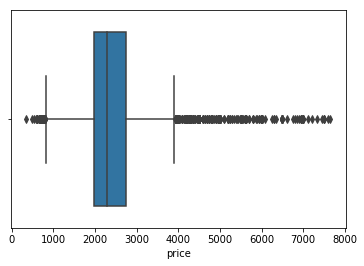

In [225]:
sns.boxplot(x=reduced_rental['price'])

In [228]:
Q1 =  reduced_rental['price'].quantile(0.25)
Q3 = reduced_rental['price'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low, high)

824.375 3905.375


In [230]:
rental_no_outlier = final_rental[(final_rental['price'] <= high) & (final_rental['price'] >= low) ]
rental_no_outlier = rental_no_outlier.drop_duplicates()

### No PCA

In [260]:
no_outlier_model = run_model(rental_no_outlier)

Training LightGBM model: 

Training Complete! Used 0.38297176361083984 seconds 

Training Accuracy: 

Mean Squared Error is: 151857.24693615624 

Root Mean Squared Error is: 389.6886538458058 

Mean Absolute Error is: 296.9490251520362 

Testing Accuracy: 

Mean Squared Error is: 238190.06849831258 

Root Mean Squared Error is: 488.04719904770747 

Mean Absolute Error is: 381.1870137444034 



In [261]:
no_outlier_model_elastic = run_model(rental_no_outlier, model = "Elastic")

Training Elastic Net model: 

Training Complete! Used 0.04587912559509277 seconds 

Training Accuracy: 

Mean Squared Error is: 296713.0434639616 

Root Mean Squared Error is: 544.7137261571087 

Mean Absolute Error is: 426.74189035610016 

Testing Accuracy: 

Mean Squared Error is: 298313.1293260775 

Root Mean Squared Error is: 546.1804915282836 

Mean Absolute Error is: 429.6698509172207 



### With PCA

In [262]:
pca_no_outlier_model = run_model(rental_no_outlier, with_pca=True, num_of_features=92)

Training LightGBM model: 

Training Complete! Used 1.0935876369476318 seconds 

Training Accuracy: 

Mean Squared Error is: 101469.57496490965 

Root Mean Squared Error is: 318.5428934459371 

Mean Absolute Error is: 239.38318208141416 

Testing Accuracy: 

Mean Squared Error is: 265153.8524609223 

Root Mean Squared Error is: 514.9309200862989 

Mean Absolute Error is: 402.2585299712676 



In [263]:
pca_no_outlier_model_elastic = run_model(rental_no_outlier, model = "Elastic", with_pca=True, num_of_features=92)

Training Elastic Net model: 

Training Complete! Used 0.008977651596069336 seconds 

Training Accuracy: 

Mean Squared Error is: 296912.6165460881 

Root Mean Squared Error is: 544.896886159288 

Mean Absolute Error is: 426.88547315113703 

Testing Accuracy: 

Mean Squared Error is: 298293.52114206034 

Root Mean Squared Error is: 546.1625409546689 

Mean Absolute Error is: 429.60172276556096 

